In [ ]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/city_day.csv')

# Filter the DataFrame to get only the data for Chennai in the "City" column
chennai_data = df[df['City'] == 'Chennai']

# Save the filtered data as a new CSV file
chennai_data.to_csv('chennai_city_day.csv', index=False)


In [ ]:
import pandas as pd

# Load the "Chennai_weather" CSV file into a Pandas DataFrame
df_weather = pd.read_csv('/content/Chennai_weather.csv')



In [ ]:
df_weather.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0


In [ ]:
# Convert the "time" column to datetime format
df_weather['time'] = pd.to_datetime(df_weather['time'])

# Filter the DataFrame to include only data from 2015 to 2020
start_date = '2015-01-01'
end_date = '2020-12-31'
filtered_weather_data = df_weather[(df_weather['time'] >= start_date) & (df_weather['time'] <= end_date)]

# Save the filtered data as a new CSV file
filtered_weather_data.to_csv('chennai_weather_2015_to_2020.csv', index=False)


<ipython-input-4-504d5262182a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_weather['time'] = pd.to_datetime(df_weather['time'])


In [ ]:
# Load the "Chennai_weather" CSV file into a Pandas DataFrame and specify the date format
df_weather = pd.read_csv('Chennai_weather.csv', parse_dates=['time'], dayfirst=True, infer_datetime_format=False)

# Filter the DataFrame to include only data from 2015 to 2020
start_date = '2015-01-01'
end_date = '2020-12-31'
filtered_weather_data = df_weather[(df_weather['time'] >= start_date) & (df_weather['time'] <= end_date)]

# Save the filtered data as a new CSV file
filtered_weather_data.to_csv('chennai_weather_2015_2020.csv', index=False)

In [ ]:
df_city = pd.read_csv('/content/chennai_city_day.csv')

In [ ]:
df_city.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
1,Chennai,2015-01-02,NaN,NaN,16.49,13.42,23.09,7.83,1.23,8.61,9.16,0.13,NaN,NaN,NaN,NaN
2,Chennai,2015-01-03,NaN,NaN,9.72,19.56,9.99,4.63,0.77,48.23,13.45,0.03,NaN,NaN,NaN,NaN
3,Chennai,2015-01-04,NaN,NaN,9.60,16.20,11.71,5.23,1.00,27.96,10.33,NaN,NaN,NaN,NaN,NaN
4,Chennai,2015-01-05,NaN,NaN,9.16,16.30,12.94,5.50,0.90,16.60,9.36,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_weather = pd.read_csv('/content/chennai_weather_2015_2020.csv')

In [ ]:
df_weather.head()

,time,tavg,tmin,tmax,prcp
0,2015-01-01,26.1,21.9,30.1,NaN
1,2015-01-02,26.8,22.2,NaN,0.5
2,2015-01-03,26.9,23.0,NaN,0.0
3,2015-01-04,26.0,22.4,30.9,NaN
4,2015-01-05,26.2,22.6,NaN,NaN


In [ ]:
df_weather.rename(columns={'time': 'Date'}, inplace=True)

# Merge the two datasets on the "Date" column
combined_data = pd.merge(df_city, df_weather, on='Date')

# Save the combined data as a new CSV file
combined_data.to_csv('combined_chennai_data.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/combined_chennai_data.csv')

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,tavg,tmin,tmax,prcp
0,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN,26.1,21.9,30.1,NaN
1,Chennai,2015-01-02,NaN,NaN,16.49,13.42,23.09,7.83,1.23,8.61,9.16,0.13,NaN,NaN,NaN,NaN,26.8,22.2,NaN,0.5
2,Chennai,2015-01-03,NaN,NaN,9.72,19.56,9.99,4.63,0.77,48.23,13.45,0.03,NaN,NaN,NaN,NaN,26.9,23.0,NaN,0.0
3,Chennai,2015-01-04,NaN,NaN,9.60,16.20,11.71,5.23,1.00,27.96,10.33,NaN,NaN,NaN,NaN,NaN,26.0,22.4,30.9,NaN
4,Chennai,2015-01-05,NaN,NaN,9.16,16.30,12.94,5.50,0.90,16.60,9.36,NaN,NaN,NaN,NaN,NaN,26.2,22.6,NaN,NaN


In [ ]:
# Drop any duplicate rows, if any
df.drop_duplicates(inplace=True)

# Handle missing values if any (replace NaNs with appropriate values)
# For example, you can replace missing values in numerical columns with their means
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'tavg', 'tmin', 'tmax', 'prcp']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Handle categorical variables (if any)
# For example, you can use one-hot encoding for the "AQI_Bucket" column
df = pd.get_dummies(df, columns=['AQI_Bucket'], drop_first=True)

# Drop unnecessary columns (if any)
# For example, if "City" is always "Chennai," you can drop it
df = df.drop(columns=['City'])


In [ ]:
df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,AQI,tavg,tmin,tmax,prcp,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
0,2015-01-01,50.425613,62.834404,16.30,15.39,22.68,4.59,1.17,9.20,11.35,...,114.502654,26.1,21.9,30.100000,11.143137,0,0,0,0,0
1,2015-01-02,50.425613,62.834404,16.49,13.42,23.09,7.83,1.23,8.61,9.16,...,114.502654,26.8,22.2,34.532798,0.500000,0,0,0,0,0
2,2015-01-03,50.425613,62.834404,9.72,19.56,9.99,4.63,0.77,48.23,13.45,...,114.502654,26.9,23.0,34.532798,0.000000,0,0,0,0,0
3,2015-01-04,50.425613,62.834404,9.60,16.20,11.71,5.23,1.00,27.96,10.33,...,114.502654,26.0,22.4,30.900000,11.143137,0,0,0,0,0
4,2015-01-05,50.425613,62.834404,9.16,16.30,12.94,5.50,0.90,16.60,9.36,...,114.502654,26.2,22.6,34.532798,11.143137,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

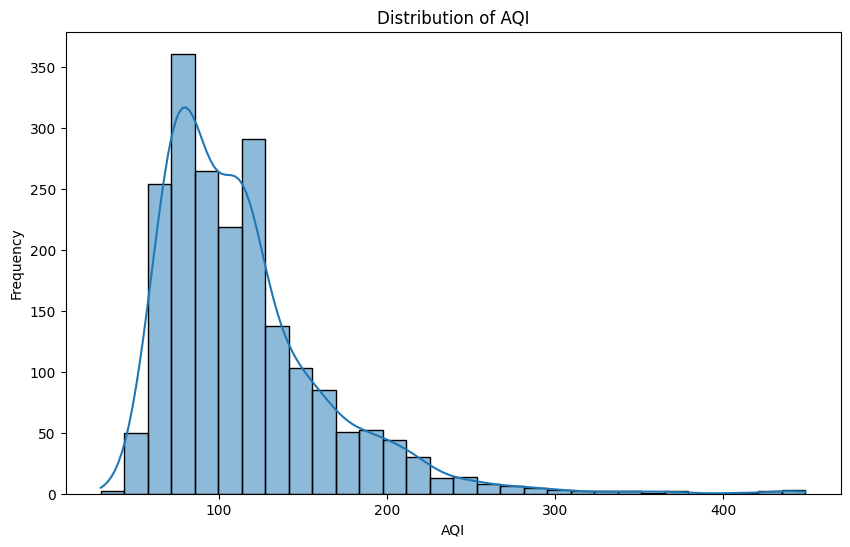

In [ ]:
# Visualize the distribution of AQI
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AQI', bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-788d143fdf71>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


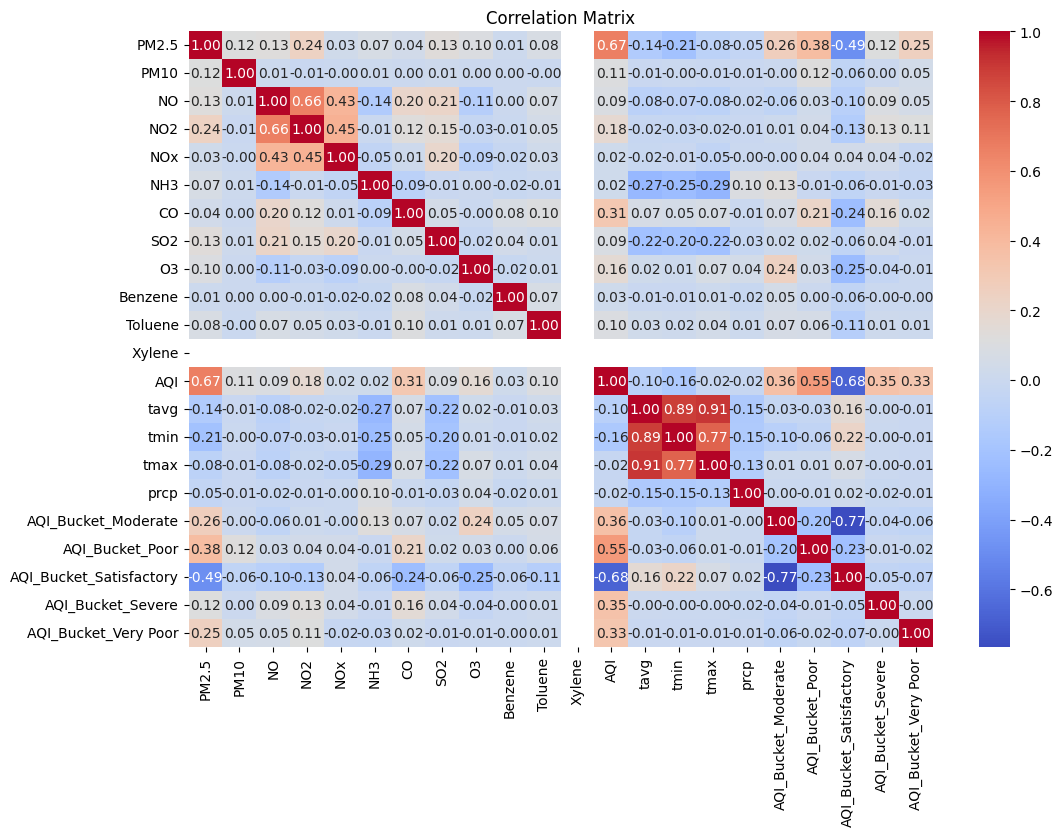

In [ ]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

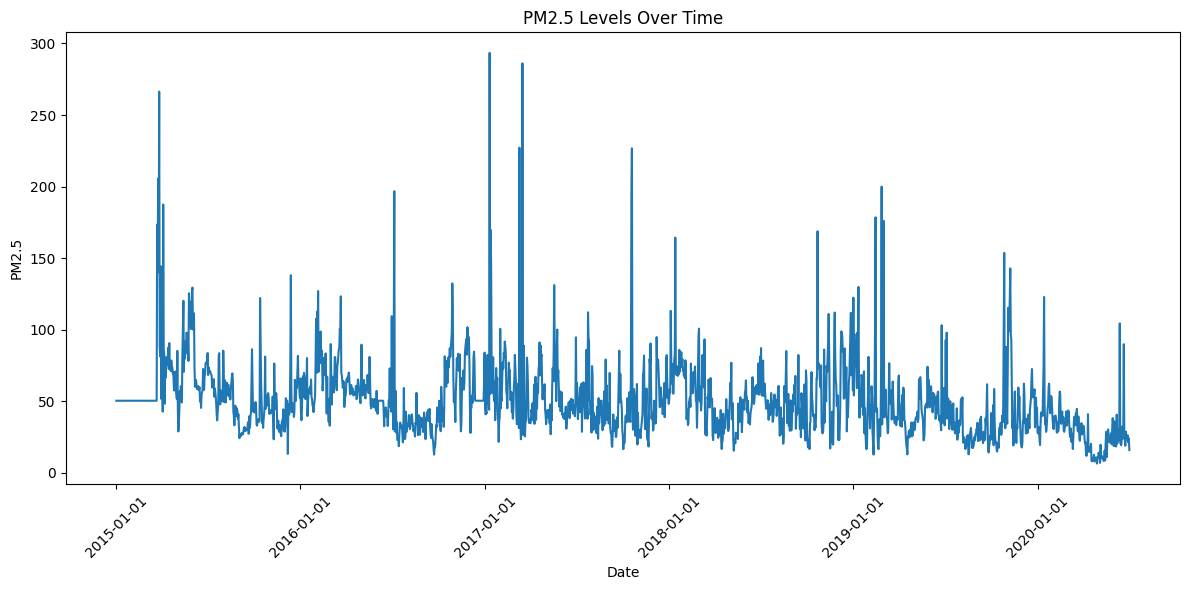

In [ ]:
# time series data (PM2.5 over time)
import matplotlib.dates as mdates
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='PM2.5')
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

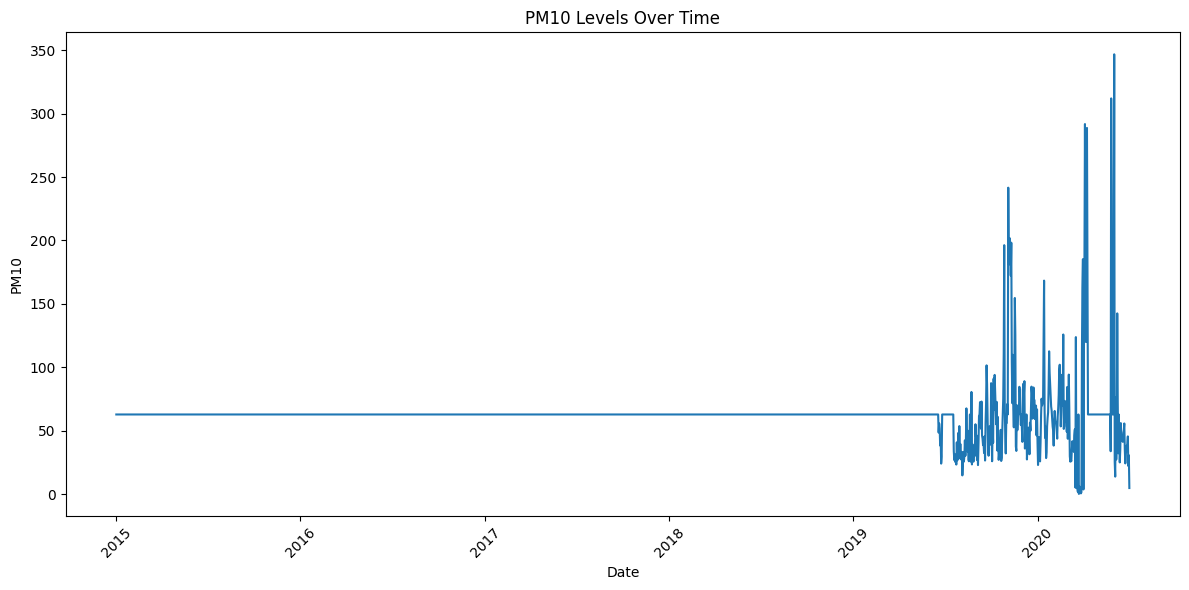

In [ ]:
# time series data (PM10 over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='PM10')
plt.title('PM10 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

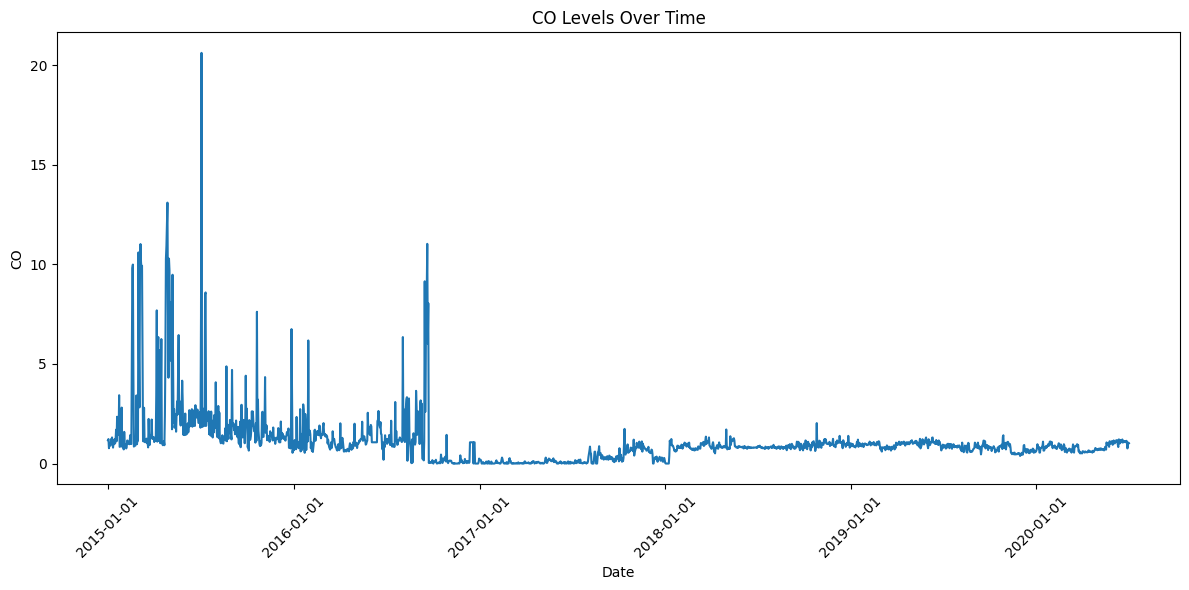

In [ ]:
# time series data (CO over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='CO')
plt.title('CO Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

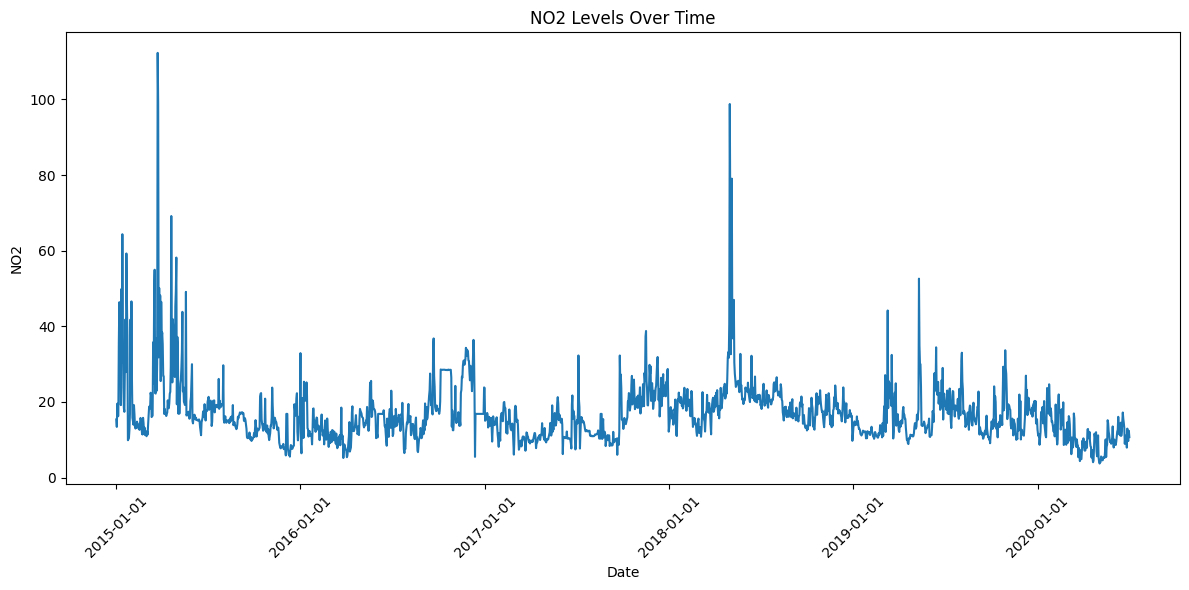

In [ ]:
# time series data (NO2 over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='NO2')
plt.title('NO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('NO2')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

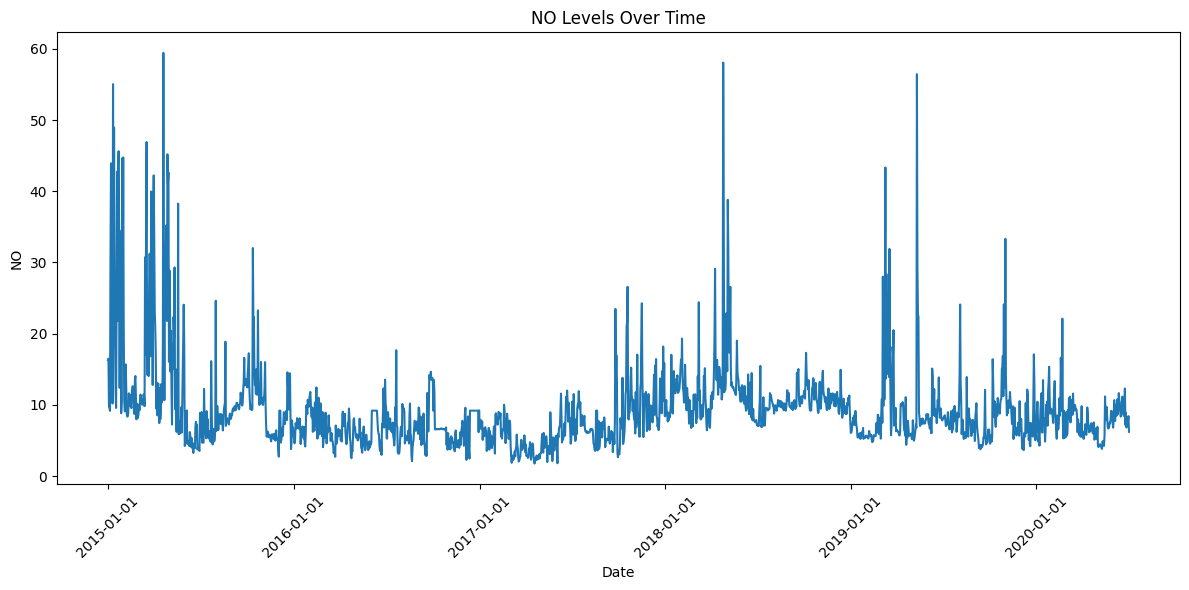

In [ ]:
# time series data (NO over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='NO')
plt.title('NO Levels Over Time')
plt.xlabel('Date')
plt.ylabel('NO')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

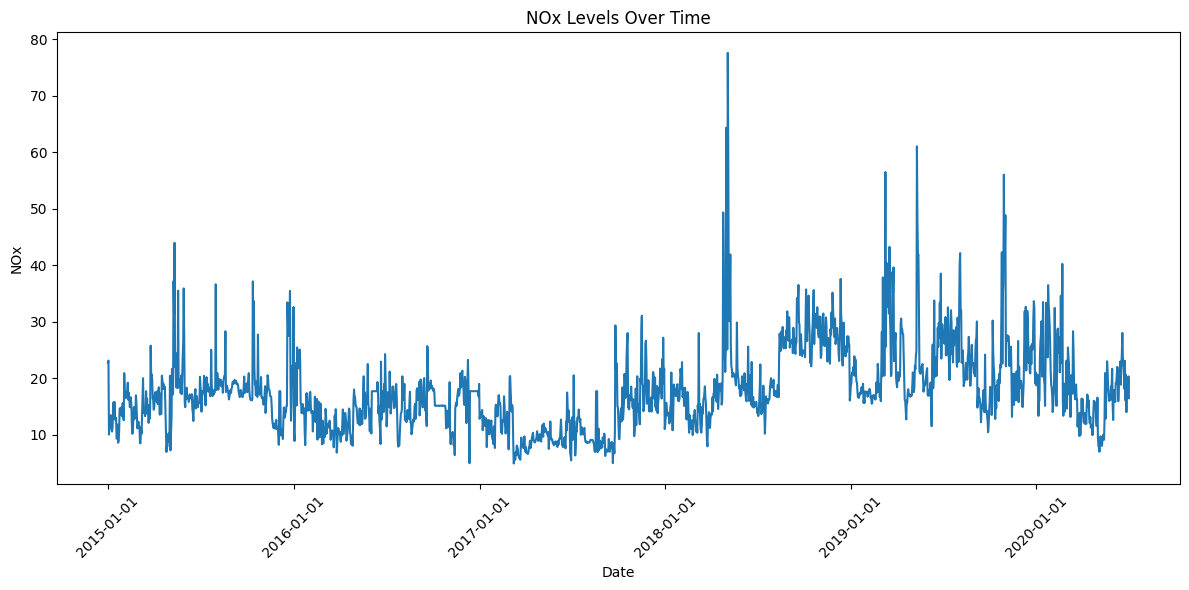

In [ ]:
# time series data (NOx over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='NOx')
plt.title('NOx Levels Over Time')
plt.xlabel('Date')
plt.ylabel('NOx')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

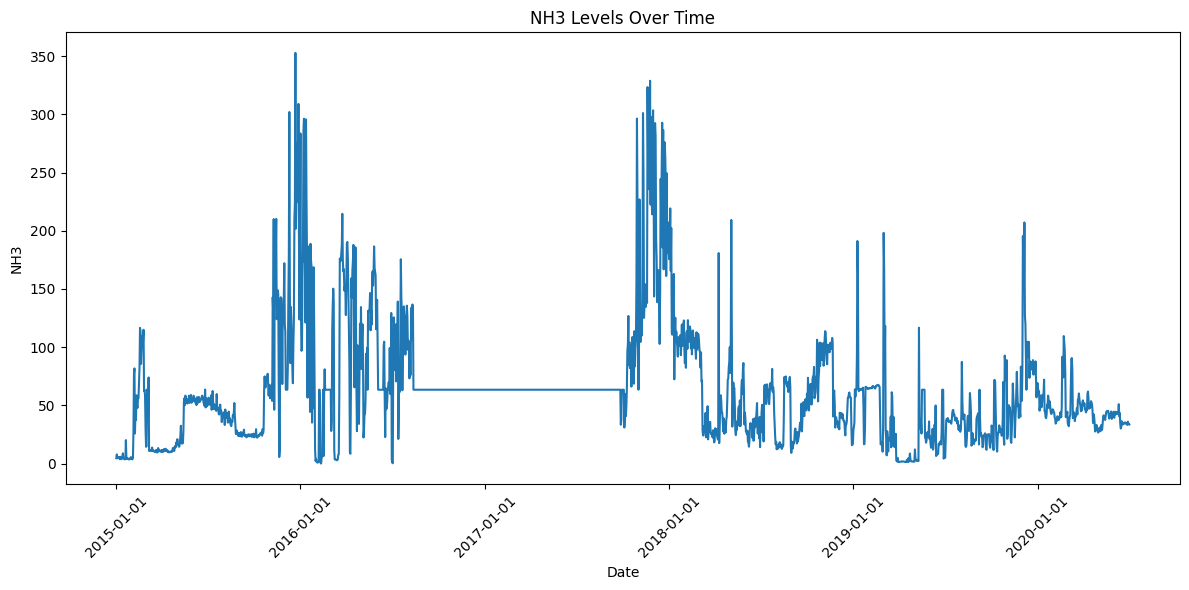

In [ ]:
# time series data (NH3 over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='NH3')
plt.title('NH3 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('NH3')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

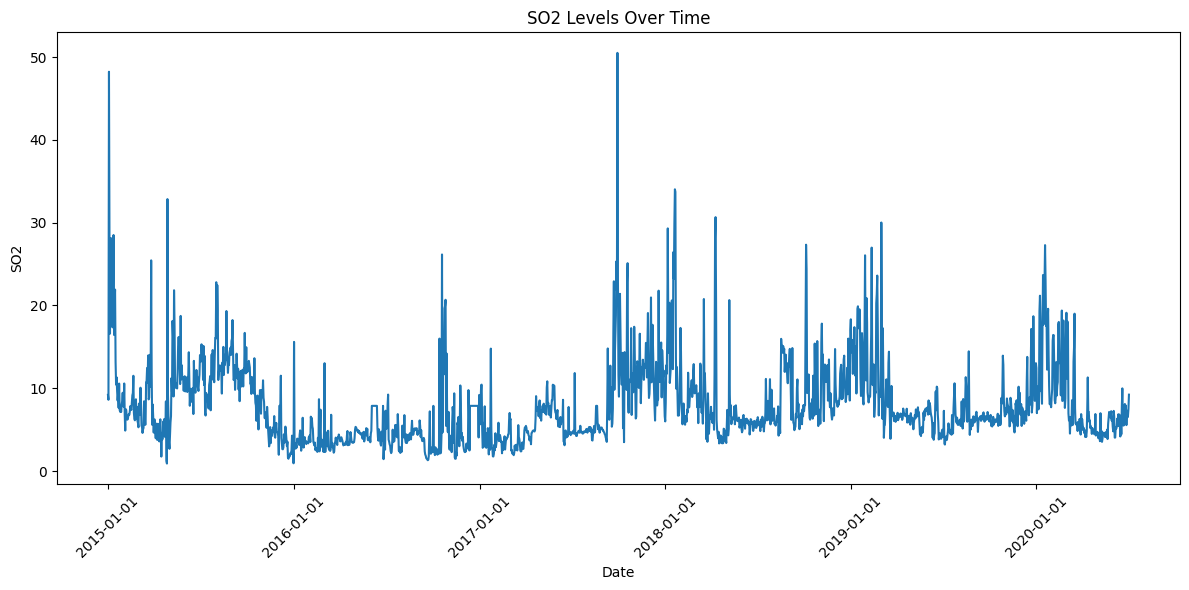

In [ ]:
# time series data (SO2 over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='SO2')
plt.title('SO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('SO2')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

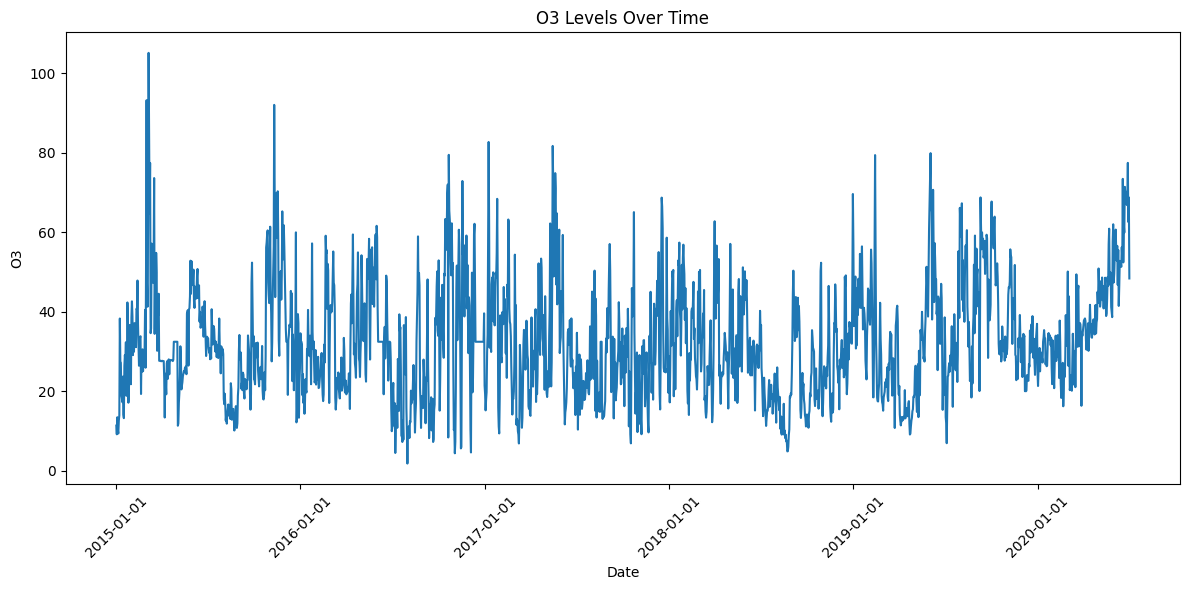

In [ ]:
# time series data (O3 over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='O3')
plt.title('O3 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('O3')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

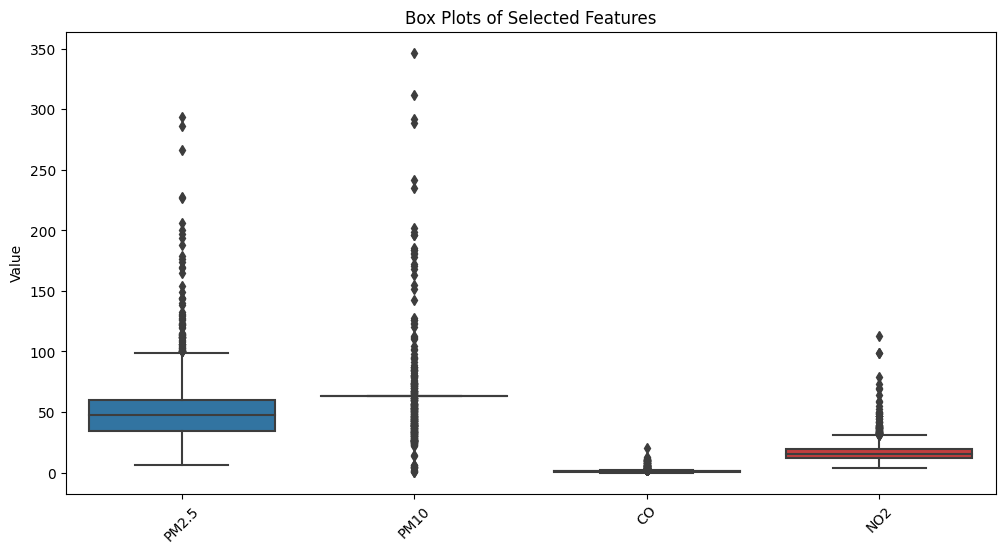

In [ ]:
# Box plots
selected_features = ['PM2.5', 'PM10', 'CO', 'NO2']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_features], orient='vertical')
plt.title('Box Plots of Selected Features')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.show()

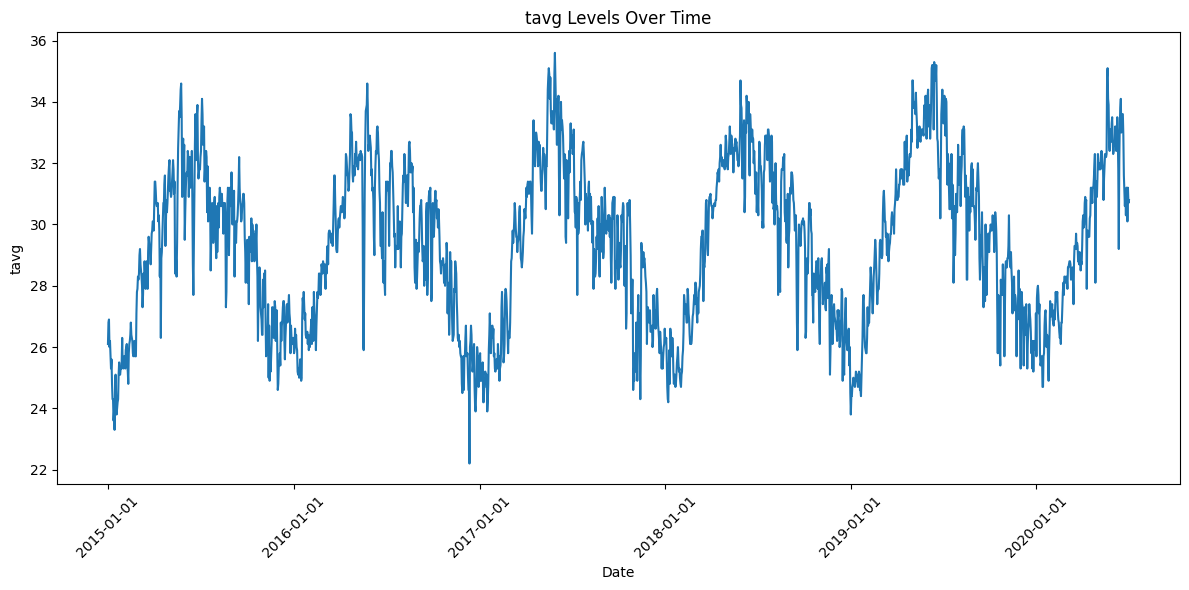

In [ ]:
# time series data (tavg over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='tavg')
plt.title('tavg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('tavg')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

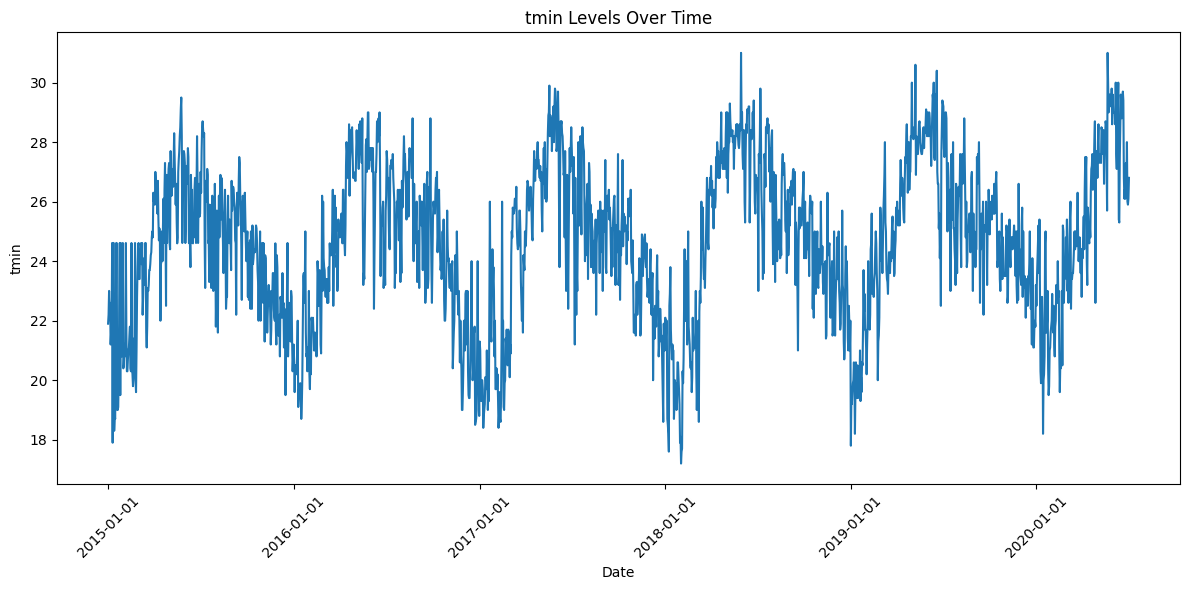

In [ ]:
# time series data (tmin over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='tmin')
plt.title('tmin Levels Over Time')
plt.xlabel('Date')
plt.ylabel('tmin')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

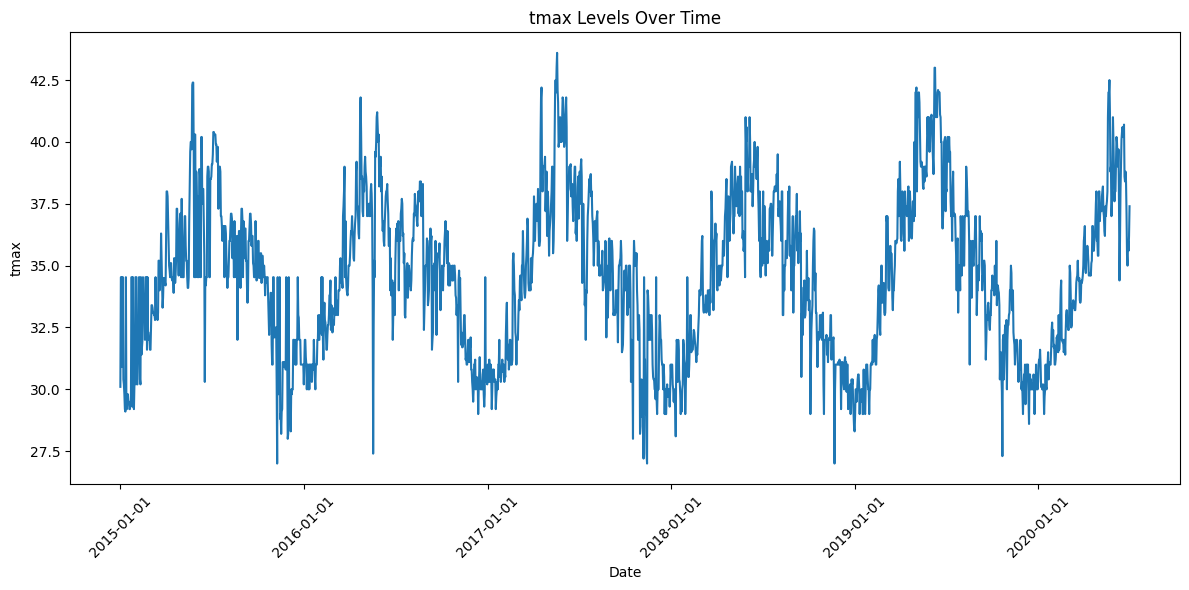

In [ ]:
# time series data (tmax over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='tmax')
plt.title('tmax Levels Over Time')
plt.xlabel('Date')
plt.ylabel('tmax')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

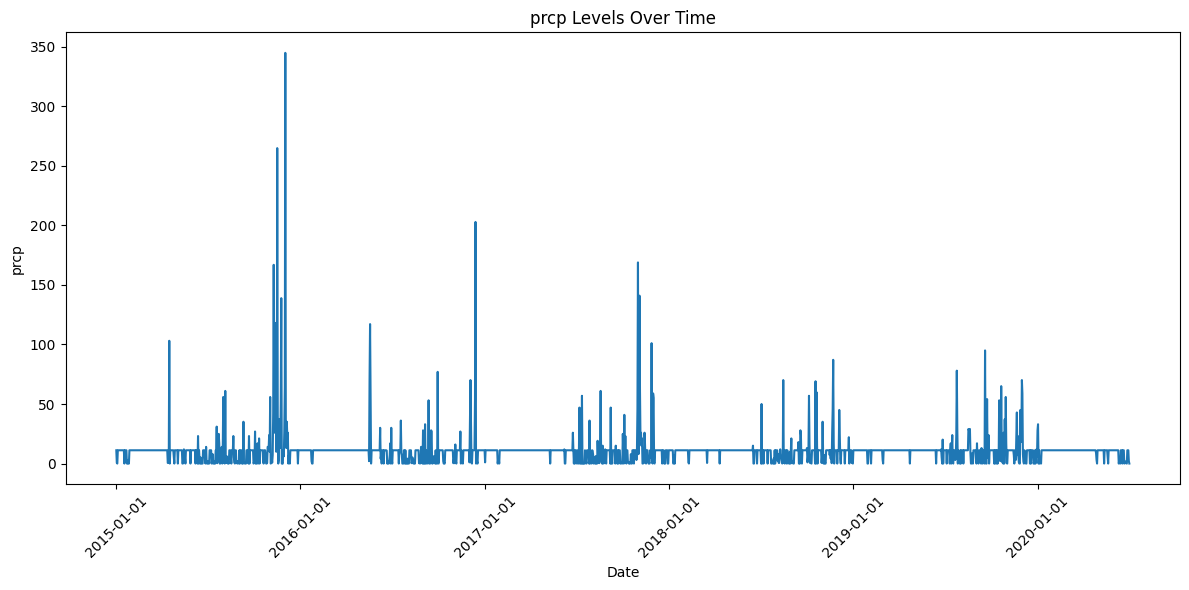

In [ ]:
# time series data (prcp over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='prcp')
plt.title('prcp Levels Over Time')
plt.xlabel('Date')
plt.ylabel('prcp')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers



selected_columns = ['PM2.5', 'AQI', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
X = df[selected_columns]
y = df[['tavg']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Build a multi-input neural network model using Keras
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')  # Adjust the number of neurons and use linear activation
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model using a separate validation set
model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

# Evaluate the model on the test set
results = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Mean Squared Error on Test Set: {results[1]}')

# Make predictions
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
predictions = scaler_y.inverse_transform(predictions_scaled)


Epoch 1/20
51/51 [==============================] - 1s 6ms/step - loss: 0.9529 - mae: 0.8160 - mse: 0.9529 - val_loss: 0.8108 - val_mae: 0.7562 - val_mse: 0.8108
Epoch 2/20
51/51 [==============================] - 0s 3ms/step - loss: 0.7801 - mae: 0.7239 - mse: 0.7801 - val_loss: 0.7529 - val_mae: 0.7221 - val_mse: 0.7529
Epoch 3/20
51/51 [==============================] - 0s 3ms/step - loss: 0.7180 - mae: 0.6884 - mse: 0.7180 - val_loss: 0.7129 - val_mae: 0.6967 - val_mse: 0.7129
Epoch 4/20
51/51 [==============================] - 0s 3ms/step - loss: 0.6768 - mae: 0.6653 - mse: 0.6768 - val_loss: 0.6888 - val_mae: 0.6853 - val_mse: 0.6888
Epoch 5/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6455 - mae: 0.6497 - mse: 0.6455 - val_loss: 0.6902 - val_mae: 0.6827 - val_mse: 0.6902
Epoch 6/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6210 - mae: 0.6376 - mse: 0.6210 - val_loss: 0.6602 - val_mae: 0.6614 - val_mse: 0.6602
Epoch 7/20
51/51 [==========

In [ ]:
from tensorflow.keras import regularizers

# Build a simpler neural network model with reduced complexity
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Adjust dropout rate
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model using early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled), callbacks=[early_stopping])

# Evaluate the model on the test set
results = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Mean Squared Error on Test Set: {results[1]}')

# Make predictions
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
predictions = scaler_y.inverse_transform(predictions_scaled)


Epoch 1/50
51/51 [==============================] - 2s 10ms/step - loss: 0.9490 - mae: 0.8055 - mse: 0.9490 - val_loss: 0.8037 - val_mae: 0.7460 - val_mse: 0.8037
Epoch 2/50
51/51 [==============================] - 0s 5ms/step - loss: 0.8417 - mae: 0.7542 - mse: 0.8417 - val_loss: 0.7817 - val_mae: 0.7387 - val_mse: 0.7817
Epoch 3/50
51/51 [==============================] - 0s 5ms/step - loss: 0.7862 - mae: 0.7275 - mse: 0.7862 - val_loss: 0.7484 - val_mae: 0.7190 - val_mse: 0.7484
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.7750 - mae: 0.7258 - mse: 0.7750 - val_loss: 0.7477 - val_mae: 0.7192 - val_mse: 0.7477
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.7343 - mae: 0.7019 - mse: 0.7343 - val_loss: 0.7242 - val_mae: 0.7037 - val_mse: 0.7242
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.7375 - mae: 0.6993 - mse: 0.7375 - val_loss: 0.7023 - val_mae: 0.6917 - val_mse: 0.7023
Epoch 7/50
51/51 [=========

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers



selected_columns = ['PM2.5', 'AQI', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
X = df[selected_columns]
y = df[['tavg']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Build a multi-input neural network model using Keras
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear')  # Adjust the number of neurons and use linear activation
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model using a separate validation set
model.fit(X_train_scaled, y_train_scaled, epochs=75, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))
results = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Mean Squared Error on Test Set: {results[1]}')

# Make predictions
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
predictions = scaler_y.inverse_transform(predictions_scaled)

Epoch 1/75
51/51 [==============================] - 3s 7ms/step - loss: 0.9546 - mae: 0.8087 - mse: 0.9546 - val_loss: 0.8188 - val_mae: 0.7558 - val_mse: 0.8188
Epoch 2/75
51/51 [==============================] - 0s 3ms/step - loss: 0.8319 - mae: 0.7495 - mse: 0.8319 - val_loss: 0.7637 - val_mae: 0.7212 - val_mse: 0.7637
Epoch 3/75
51/51 [==============================] - 0s 3ms/step - loss: 0.7689 - mae: 0.7145 - mse: 0.7689 - val_loss: 0.7146 - val_mae: 0.7007 - val_mse: 0.7146
Epoch 4/75
51/51 [==============================] - 0s 3ms/step - loss: 0.7386 - mae: 0.7010 - mse: 0.7386 - val_loss: 0.6918 - val_mae: 0.6874 - val_mse: 0.6918
Epoch 5/75
51/51 [==============================] - 0s 3ms/step - loss: 0.6909 - mae: 0.6767 - mse: 0.6909 - val_loss: 0.6922 - val_mae: 0.6766 - val_mse: 0.6922
Epoch 6/75
51/51 [==============================] - 0s 3ms/step - loss: 0.7041 - mae: 0.6829 - mse: 0.7041 - val_loss: 0.6574 - val_mae: 0.6636 - val_mse: 0.6574
Epoch 7/75
51/51 [==========

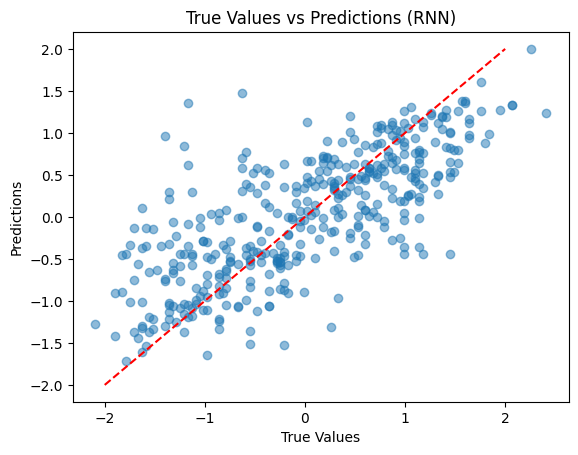

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of true vs predicted values
plt.scatter(y_test_scaled, predictions_scaled, alpha=0.5)
plt.plot([-2, 2], [-2, 2], color='red', linestyle='--')  # Identity line (y=x)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (RNN)')
plt.show()


In [ ]:
# LSTM
selected_columns = ['PM2.5', 'AQI', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'tavg']
df_needed = df[selected_columns].astype(float)
df_needed.head()
ss = StandardScaler()
df_scaled = ss.fit_transform(df_needed)
trainX = []
trainY = []
n_future = 1
n_past = 14

for i in range(n_past, len(df_scaled) - n_future+1):
  trainX.append(df_scaled[i-n_past:i, 0:df_scaled.shape[1]])
  trainY.append(df_scaled[i+n_future-1:i+n_future, -1])
trainX, trainY = np.array(trainX), np.array(trainY)
trainX.shape, trainY.shape
model = keras.Sequential()
model.add(layers.LSTM(64,activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(layers.LSTM(16, activation='relu', return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model.summary()
history = model.fit(trainX, trainY, epochs=15, batch_size=16, validation_split=0.2, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 64)            19456     
                                                                 
 lstm_3 (LSTM)               (None, 16)                5184      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 24657 (96.32 KB)
Trainable params: 24657 (96.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
100/100 [==============================] - 5s 18ms/step - loss: 0.4265 - mae: 0.5088 - mse: 0.4265 - val_loss: 0.2945 - val_mae: 0.4463 - v

63/63 [==============================] - 1s 7ms/step


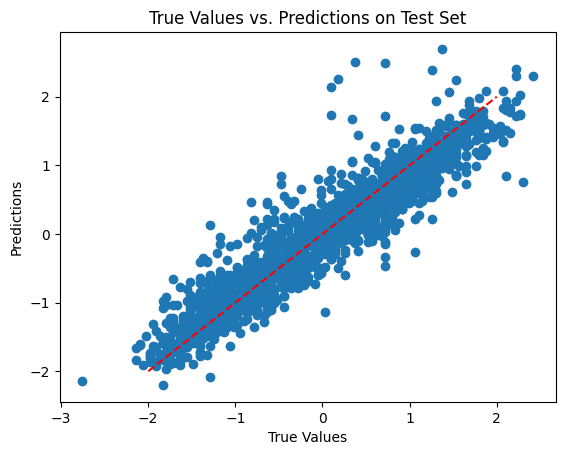

In [ ]:
test_selected_columns = ['PM2.5', 'AQI', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'tavg']
test_df_needed = df[test_selected_columns].astype(float)
test_df_scaled = ss.transform(test_df_needed)

testX = []
testY = []

# Generate sequences for test data
for i in range(n_past, len(test_df_scaled) - n_future + 1):
    testX.append(test_df_scaled[i - n_past:i, 0:test_df_scaled.shape[1]])
    testY.append(test_df_scaled[i + n_future - 1:i + n_future, -1])

testX, testY = np.array(testX), np.array(testY)

# Reshape the test data to match the model's input shape
testX = testX.reshape((testX.shape[0], testX.shape[1], testX.shape[2]))

# Make predictions on the test set
test_predictions = model.predict(testX)

# Inverse transform the scaled values to get the actual values
#testY_actual = ss.inverse_transform(testY.reshape(-1, testY.shape[-1]))
#test_predictions_actual = ss.inverse_transform(test_predictions.reshape(-1, 1))

# Plot the predictions vs true values
plt.scatter(testY, test_predictions)
plt.plot([-2, 2], [-2, 2], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions on Test Set')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Reshape the target variable for Random Forest
y_train_scaled_1d = y_train_scaled.ravel()

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train_scaled_1d)

# Make predictions on the test set
rf_predictions_scaled = rf_model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
# Reshape predictions to a 2D array before inverse transform
rf_predictions_scaled_2d = rf_predictions_scaled.reshape(-1, 1)

# Inverse transform the predictions to the original scale
rf_predictions = scaler_y.inverse_transform(rf_predictions_scaled_2d)

# Evaluate the model
rf_mse = mean_squared_error(y_test_scaled, rf_predictions_scaled)
print(f'Mean Squared Error on Test Set (Random Forest): {rf_mse}')


Mean Squared Error on Test Set (Random Forest): 0.41551280667353496


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train_scaled_1d)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
rf_predictions_scaled = best_rf_model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
rf_predictions_scaled_2d = rf_predictions_scaled.reshape(-1, 1)
rf_predictions = scaler_y.inverse_transform(rf_predictions_scaled_2d)

# Evaluate the model
rf_mse = mean_squared_error(y_test_scaled, rf_predictions_scaled)
rf_mae = mean_absolute_error(y_test_scaled, rf_predictions_scaled)
rf_r2 = r2_score(y_test_scaled, rf_predictions_scaled)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error on Test Set (Random Forest): {rf_mse}')
print(f'Mean Absolute Error on Test Set (Random Forest): {rf_mae}')
print(f'R-squared on Test Set (Random Forest): {rf_r2}')


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error on Test Set (Random Forest): 0.41227523815241296
Mean Absolute Error on Test Set (Random Forest): 0.48132100864126115
R-squared on Test Set (Random Forest): 0.5742116281871994


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
selected_columns = ['PM2.5', 'AQI', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
X = df[selected_columns]
y = df[['tavg']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Best hyperparameters
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Initialize the Random Forest Regressor with the best hyperparameters
rf_model = RandomForestRegressor(**best_params, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions on the test set
rf_predictions_scaled = rf_model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
rf_predictions_scaled_2d = rf_predictions_scaled.reshape(-1, 1)
rf_predictions = scaler_y.inverse_transform(rf_predictions_scaled_2d)

# Evaluate the model
rf_mse = mean_squared_error(y_test_scaled, rf_predictions_scaled)
rf_mae = mean_absolute_error(y_test_scaled, rf_predictions_scaled)
rf_r2 = r2_score(y_test_scaled, rf_predictions_scaled)


print(f'Mean Squared Error on Test Set (Random Forest): {rf_mse}')
print(f'Mean Absolute Error on Test Set (Random Forest): {rf_mae}')
print(f'R-squared on Test Set (Random Forest): {rf_r2}')


Mean Squared Error on Test Set (Random Forest): 0.41227523815241296
Mean Absolute Error on Test Set (Random Forest): 0.48132100864126115
R-squared on Test Set (Random Forest): 0.5742116281871994


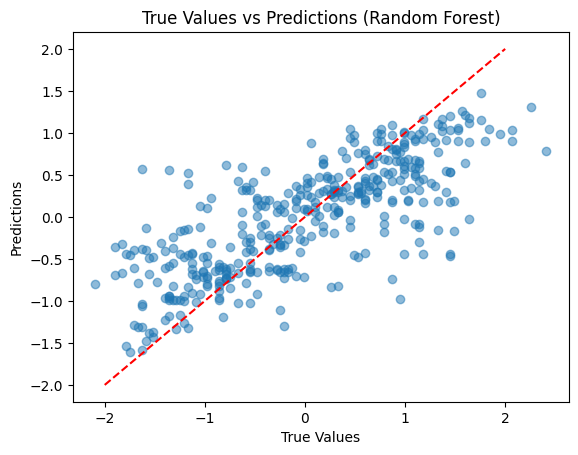

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of true vs predicted values
plt.scatter(y_test_scaled, rf_predictions_scaled, alpha=0.5)
plt.plot([-2, 2], [-2, 2], color='red', linestyle='--')  # Identity line (y=x)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Random Forest)')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

# Make predictions on the test set
gb_predictions_scaled = best_gb_model.predict(X_test_scaled)
gb_predictions_scaled_2d = gb_predictions_scaled.reshape(-1, 1)

# Inverse transform the predictions to the original scale
gb_predictions = scaler_y.inverse_transform(gb_predictions_scaled_2d)

# Evaluate the model
gb_mse = mean_squared_error(y_test_scaled, gb_predictions_scaled)
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error on Test Set (Gradient Boosting): {gb_mse}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error on Test Set (Gradient Boosting): 0.4335784412478766


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
xgb_predictions_scaled = best_xgb_model.predict(X_test_scaled)
xgb_predictions_scaled_2d = xgb_predictions_scaled.reshape(-1, 1)

# Inverse transform the predictions to the original scale
xgb_predictions = scaler_y.inverse_transform(xgb_predictions_scaled_2d)

# Evaluate the model
xgb_mse = mean_squared_error(y_test_scaled, xgb_predictions_scaled)
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error on Test Set (XGBoost): {xgb_mse}')


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error on Test Set (XGBoost): 0.41730359995088506


In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasRegressor

# Function to create the LSTM model
def create_lstm_model(units=64, dropout_rate=0.2):
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

# Create a KerasRegressor based on the LSTM model
lstm_regressor = KerasRegressor(build_fn=create_lstm_model, epochs=50, batch_size=32, verbose=0, dropout_rate=0.2, units=64)

# Define the hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lstm_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_reshaped, y_train_scaled)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_lstm_model = grid_search.best_estimator_

# Evaluate the LSTM model on the test set
results = best_lstm_model.score(X_test_reshaped, y_test_scaled)
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error on Test Set: {results}')

# Make predictions
predictions_scaled = best_lstm_model.predict(X_test_reshaped)

# Inverse transform the predictions to the original scale
predictions = scaler_y.inverse_transform(predictions_scaled)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best Hyperparameters: {'dropout_rate': 0.3, 'units': 128}
Mean Squared Error on Test Set: 0.5085072158504074


In [ ]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svm_model = SVR()

# Fit the model
svm_model.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions on the test set
svm_predictions_scaled = svm_model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
svm_predictions = scaler_y.inverse_transform(svm_predictions_scaled.reshape(-1, 1))

# Evaluate the model
svm_mse = mean_squared_error(y_test_scaled, svm_predictions_scaled)
print(f'Mean Squared Error on Test Set (Support Vector Machine): {svm_mse}')


Mean Squared Error on Test Set (Support Vector Machine): 0.5835654178522185


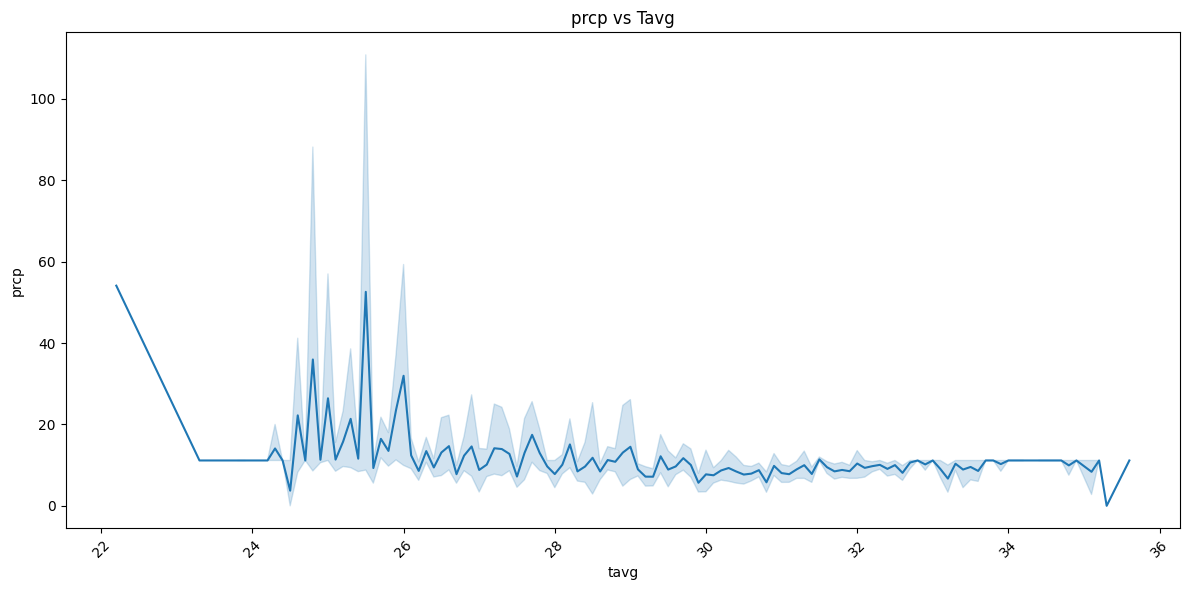

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='tavg', y='prcp')
plt.title('prcp vs Tavg')
plt.xlabel('tavg')
plt.ylabel('prcp')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

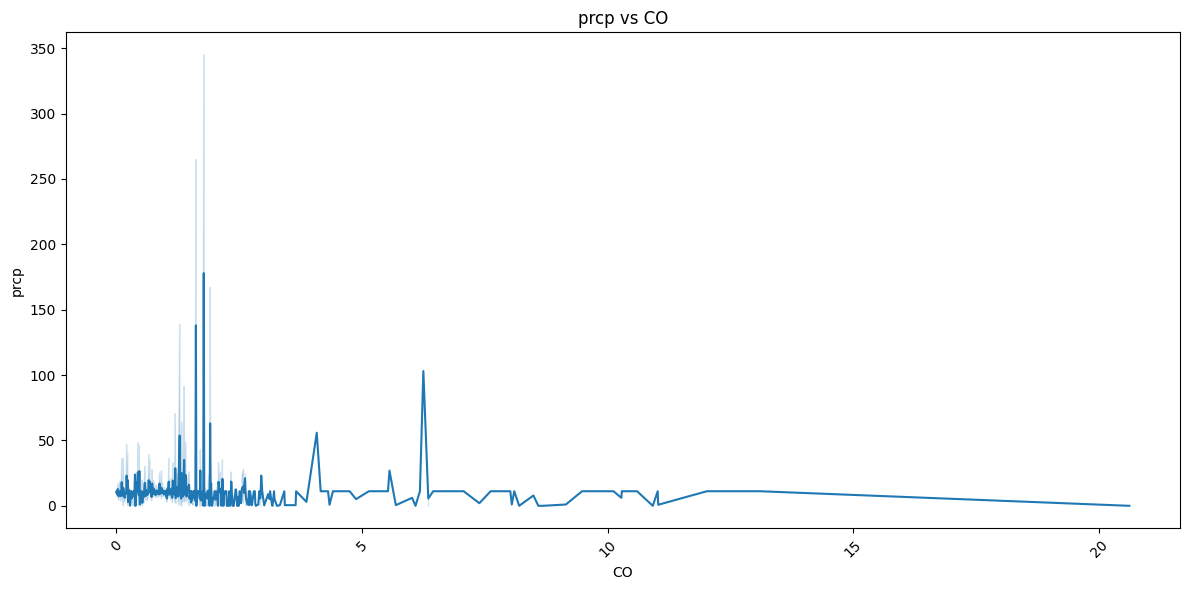

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='CO', y='prcp')
plt.title('prcp vs CO')
plt.xlabel('CO')
plt.ylabel('prcp')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

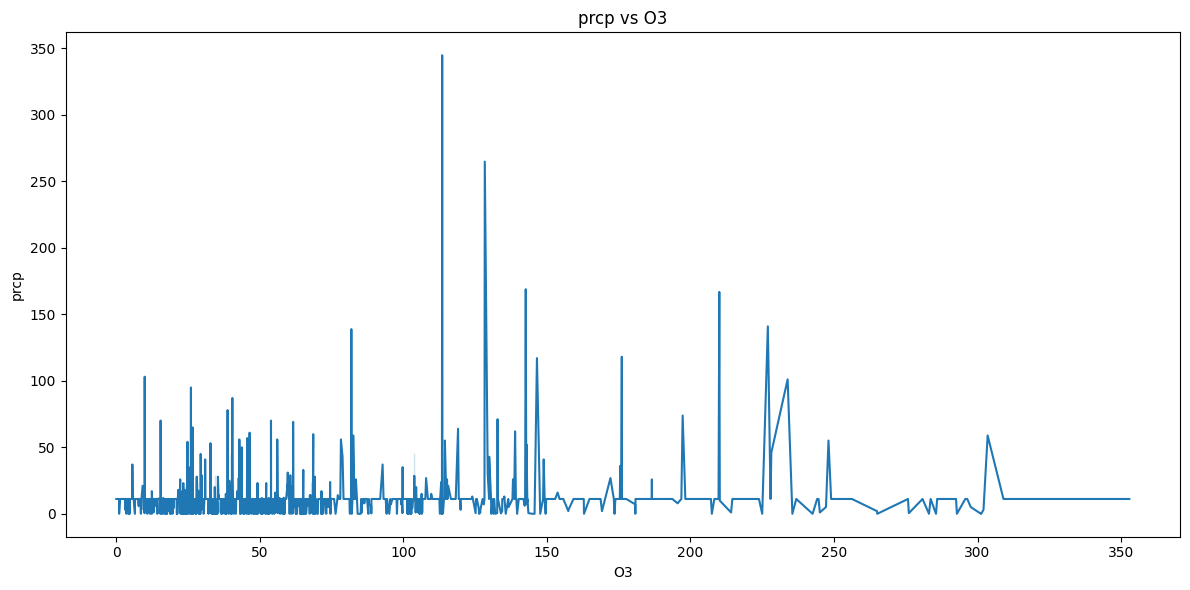

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='NH3', y='prcp')
plt.title('prcp vs O3')
plt.xlabel('O3')
plt.ylabel('prcp')


plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'df' is your DataFrame

selected_columns = ['PM2.5', 'AQI', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'tavg']
X = df[selected_columns]
y = df[['prcp']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Build a multi-input neural network model using Keras
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')  # Adjust the number of neurons and use linear activation
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model using a separate validation set
model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

# Evaluate the model on the test set
results = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Mean Squared Error on Test Set: {results[1]}')

# Make predictions
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
predictions = scaler_y.inverse_transform(predictions_scaled)


Epoch 1/50
51/51 [==============================] - 2s 14ms/step - loss: 0.9920 - mae: 0.3820 - mse: 0.9920 - val_loss: 1.3747 - val_mae: 0.4625 - val_mse: 1.3747
Epoch 2/50
51/51 [==============================] - 0s 10ms/step - loss: 0.9414 - mae: 0.3972 - mse: 0.9414 - val_loss: 1.3618 - val_mae: 0.4581 - val_mse: 1.3618
Epoch 3/50
51/51 [==============================] - 0s 8ms/step - loss: 0.9110 - mae: 0.3809 - mse: 0.9110 - val_loss: 1.3408 - val_mae: 0.4504 - val_mse: 1.3408
Epoch 4/50
51/51 [==============================] - 0s 5ms/step - loss: 0.8940 - mae: 0.3695 - mse: 0.8940 - val_loss: 1.3299 - val_mae: 0.4618 - val_mse: 1.3299
Epoch 5/50
51/51 [==============================] - 0s 9ms/step - loss: 0.8793 - mae: 0.3789 - mse: 0.8793 - val_loss: 1.3284 - val_mae: 0.4481 - val_mse: 1.3284
Epoch 6/50
51/51 [==============================] - 0s 10ms/step - loss: 0.8592 - mae: 0.3736 - mse: 0.8592 - val_loss: 1.3105 - val_mae: 0.4630 - val_mse: 1.3105
Epoch 7/50
51/51 [=======

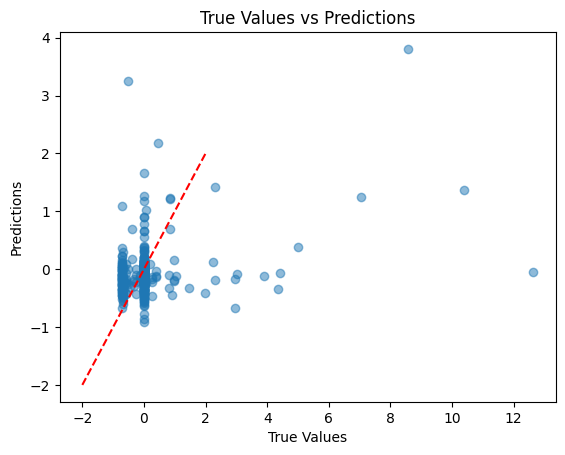

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of true vs predicted values
plt.scatter(y_test_scaled, predictions_scaled, alpha=0.5)
plt.plot([-2, 2], [-2, 2], color='red', linestyle='--')  # Identity line (y=x)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


In [ ]:
# LSTM
selected_columns = ['PM2.5', 'AQI', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','tavg', 'prcp']
df_needed = df[selected_columns].astype(float)
df_needed.head()
ss = StandardScaler()
df_scaled = ss.fit_transform(df_needed)
trainX = []
trainY = []
n_future = 1
n_past = 14

for i in range(n_past, len(df_scaled) - n_future+1):
  trainX.append(df_scaled[i-n_past:i, 0:df_scaled.shape[1]])
  trainY.append(df_scaled[i+n_future-1:i+n_future, -1])
trainX, trainY = np.array(trainX), np.array(trainY)
trainX.shape, trainY.shape
model = keras.Sequential()
model.add(layers.LSTM(64,activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(layers.LSTM(16, activation='relu', return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model.summary()
history = model.fit(trainX, trainY, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 14, 64)            19712     
                                                                 
 lstm_11 (LSTM)              (None, 16)                5184      
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 24913 (97.32 KB)
Trainable params: 24913 (97.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
100/100 [==============================] - 5s 26ms/step - loss: 1.1418 - mae: 0.3586 - mse: 1.1418 - val_loss: 0.4231 - val_mae: 0.2969 - v

63/63 [==============================] - 1s 4ms/step


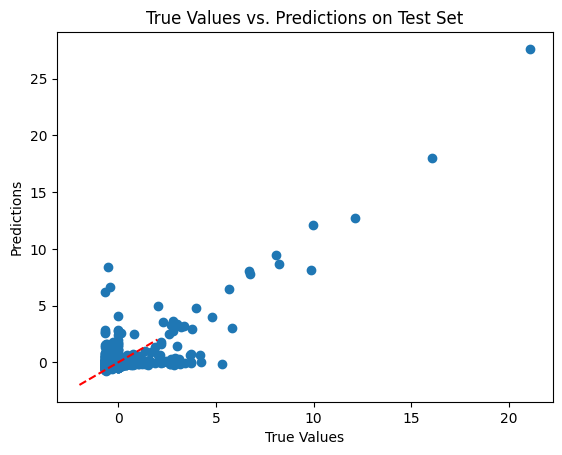

In [ ]:
test_selected_columns = ['PM2.5', 'AQI', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'tavg','prcp']
test_df_needed = df[test_selected_columns].astype(float)
test_df_scaled = ss.transform(test_df_needed)

testX = []
testY = []

# Generate sequences for test data
for i in range(n_past, len(test_df_scaled) - n_future + 1):
    testX.append(test_df_scaled[i - n_past:i, 0:test_df_scaled.shape[1]])
    testY.append(test_df_scaled[i + n_future - 1:i + n_future, -1])

testX, testY = np.array(testX), np.array(testY)

# Reshape the test data to match the model's input shape
testX = testX.reshape((testX.shape[0], testX.shape[1], testX.shape[2]))

# Make predictions on the test set
test_predictions = model.predict(testX)


# Plot the predictions vs true values
plt.scatter(testY, test_predictions)
plt.plot([-2, 2], [-2, 2], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions on Test Set')
plt.show()
